In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load the dataset (replace with your dataset file)
data = pd.read_csv("/content/heart.csv")

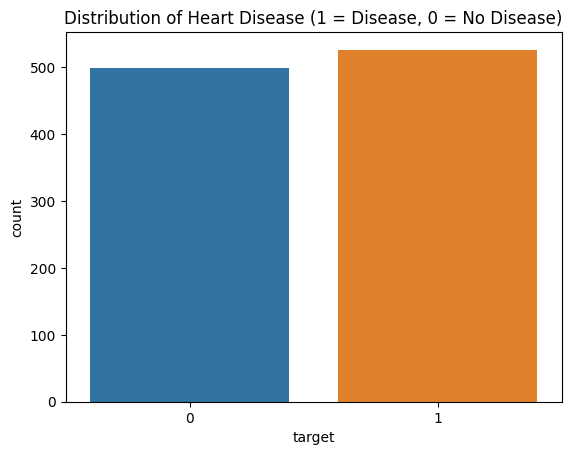

In [3]:
# Data Exploration and Visualization
# Visualize the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.show()

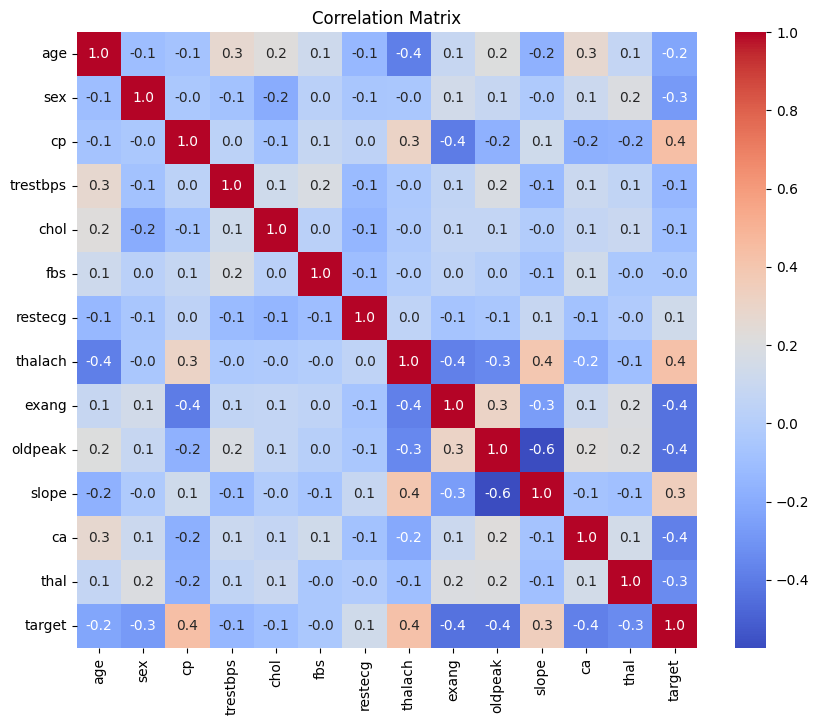

In [4]:
# Explore correlations between features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Data Preparation
X = data.drop(columns=["target"])
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build the Deep Learning Model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
21/21 [==============================] - 1s 13ms/step - loss: 0.6053 - accuracy: 0.6890 - val_loss: 0.5252 - val_accuracy: 0.7805
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 0.4078 - accuracy: 0.8521 - val_loss: 0.4522 - val_accuracy: 0.7988
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: 0.3275 - accuracy: 0.8735 - val_loss: 0.4355 - val_accuracy: 0.7988
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: 0.2967 - accuracy: 0.8811 - val_loss: 0.4315 - val_accuracy: 0.7988
Epoch 5/20
21/21 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.8963 - val_loss: 0.4227 - val_accuracy: 0.8110
Epoch 6/20
21/21 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.8979 - val_loss: 0.4236 - val_accuracy: 0.8049
Epoch 7/20
21/21 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.9070 - val_loss: 0.4152 - val_accuracy: 0.8232
Epoch 8/20
21/21 [=

In [8]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

7/7 [==============================] - 0s 3ms/step - loss: 0.3015 - accuracy: 0.8634
Test accuracy: 0.8634146451950073


In [9]:
# Predict Risk and Generate a Classification Report
predictions = model.predict(X_test)
yes_threshold = 0.7
no_threshold = 0.3
predicted_labels = []

for prediction in predictions:
    if prediction > yes_threshold:
        predicted_labels.append("Yes")
    elif prediction < no_threshold:
        predicted_labels.append("No")
    else:
        predicted_labels.append("Possibility")

7/7 [==============================] - 0s 3ms/step


In [10]:
# Example of printing predictions
for i, prediction in enumerate(predicted_labels):
    print(f"Patient {i + 1}: {prediction}")

Patient 1: Yes
Patient 2: Yes
Patient 3: No
Patient 4: Yes
Patient 5: No
Patient 6: Yes
Patient 7: No
Patient 8: No
Patient 9: Yes
Patient 10: No
Patient 11: Yes
Patient 12: No
Patient 13: Yes
Patient 14: Yes
Patient 15: No
Patient 16: Possibility
Patient 17: No
Patient 18: Yes
Patient 19: Yes
Patient 20: No
Patient 21: Possibility
Patient 22: No
Patient 23: Yes
Patient 24: No
Patient 25: Possibility
Patient 26: Yes
Patient 27: Yes
Patient 28: Yes
Patient 29: No
Patient 30: Yes
Patient 31: No
Patient 32: Yes
Patient 33: Possibility
Patient 34: Yes
Patient 35: Yes
Patient 36: Possibility
Patient 37: Possibility
Patient 38: Possibility
Patient 39: Yes
Patient 40: Yes
Patient 41: No
Patient 42: No
Patient 43: Yes
Patient 44: Yes
Patient 45: No
Patient 46: No
Patient 47: No
Patient 48: No
Patient 49: Possibility
Patient 50: No
Patient 51: Possibility
Patient 52: No
Patient 53: Possibility
Patient 54: No
Patient 55: Yes
Patient 56: Yes
Patient 57: No
Patient 58: No
Patient 59: Yes
Patient 6

In [15]:
# Ensure that the labels are strings
y_test = y_test.astype(str)
predicted_labels = [str(label) for label in predicted_labels]


In [17]:
target_names = ['No', 'Yes', 'Possibility']


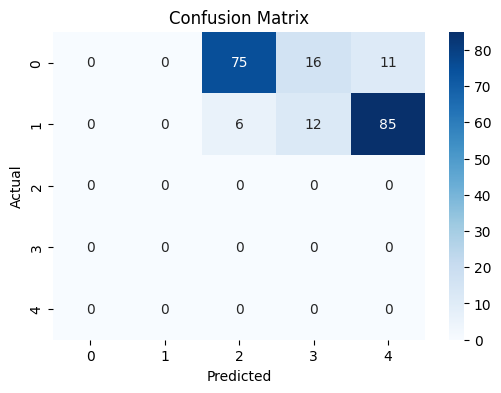

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





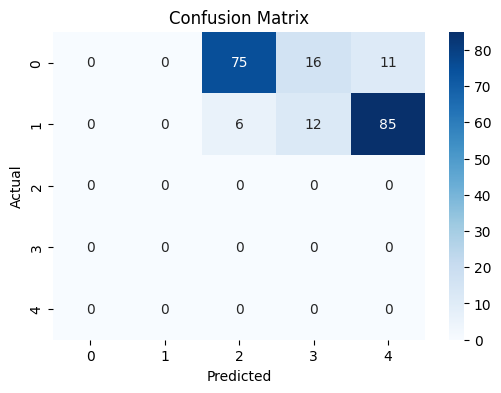

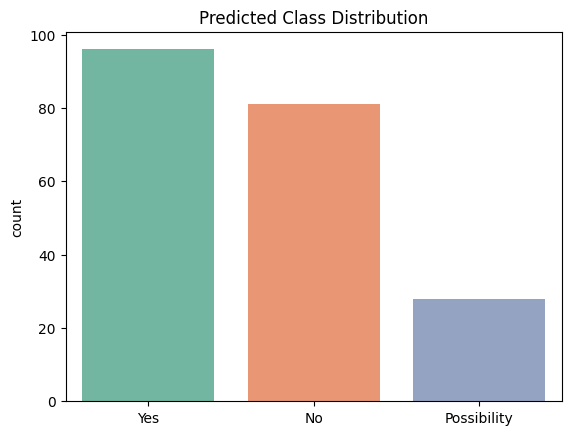

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure that the labels are strings
y_test = y_test.astype(str)
predicted_labels = [str(label) for label in predicted_labels]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the distribution of predicted classes
sns.countplot(x=predicted_labels, palette='Set2')
plt.title('Predicted Class Distribution')
plt.show()


In [24]:
pip install reportlab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00


In [32]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet
from io import BytesIO
from sklearn.metrics import classification_report
from IPython.display import FileLink
import os

# Create a PDF report
pdf_buffer = BytesIO()
doc = SimpleDocTemplate(pdf_buffer, pagesize=letter)
styles = getSampleStyleSheet()
report = []

# Add a title
title = Paragraph("Heart Disease Risk Prediction Report", styles["Title"])
report.append(title)

# Generate the classification report
classification_rep = classification_report(y_test, predicted_labels, output_dict=False)

# Convert the classification report text into paragraphs
report.append(Paragraph("Classification Report:", styles["Heading2"]))
classification_rep = classification_rep.split('\n')
for line in classification_rep[2:]:  # Skip the first two lines
    report.append(Paragraph(line, styles["Normal"]))

# Include the predictions in the report
report.append(Paragraph("Predicted Labels:", styles["Heading2"]))
for i, prediction in enumerate(predicted_labels):
    report.append(Paragraph(f"Sample {i + 1}: {prediction}", styles["Normal"]))

# Build the PDF
doc.build(report)

# Save the PDF to a file
pdf_filename = "heart_disease_prediction_report.pdf"
with open(pdf_filename, "wb") as f:
    f.write(pdf_buffer.getvalue())

print(f"PDF report saved as {pdf_filename}")

# Download the PDF to your device
FileLink(pdf_filename)



PDF report saved as heart_disease_prediction_report.pdf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

/content/heart_disease_prediction_report.pdf

In [34]:
# Save the PDF to a file in your current working directory
pdf_filename = "heart_disease_prediction_report.pdf"
with open(pdf_filename, "wb") as f:
    f.write(pdf_buffer.getvalue())

print(f"PDF report saved as {pdf_filename}")


PDF report saved as heart_disease_prediction_report.pdf
